In [12]:
from polygon_tally import *
import numpy as np
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt

# getting quad points 

In [126]:
def qp_circle(mesh_size):
    xs = np.linspace(-1, 1, mesh_size)
    ys = np.linspace(-1, 1, mesh_size)
    
    xs, ys = np.meshgrid(xs, ys)
    
    xgs = []
    ygs = []
    
    for xcol, ycol in zip(xs, ys):
        for x, y in zip(xcol, ycol):
            if (x**2 + y**2) > 1:
                continue
        
            xgs.append(x)
            ygs.append(y)

    return xgs, ygs


h = 2**(-1/2)
def get_ys(n, y0):
    return np.linspace(y0 - h, y0 + h, n)


def get_xs(n, x0, y0, y):
    xr = x0 + radius - (radius * abs(y - y0) / h / 2)
    xl = x0 - radius + (radius * abs(y - y0) / h / 2)

    m = abs(int(n * (1 - abs(y - y0) / 2 / h)))
    return np.linspace(xl, xr, m)


def qp_hex(dx, center=(0, 0)):
    x0, y0 = center
    n = int(2 * h / dx)

    ys = get_ys(n, y0)
    points = []

    count = 0

    for y in ys:
        xs = get_xs(n, x0, y0, y)
        count += len(xs)
        for x in xs:
            points.append(np.array([x, y]))

    xgs = []
    ygs = []

    for point in points:
        x, y = point
        xgs.append(x)
        ygs.append(y)
    return xgs, ygs

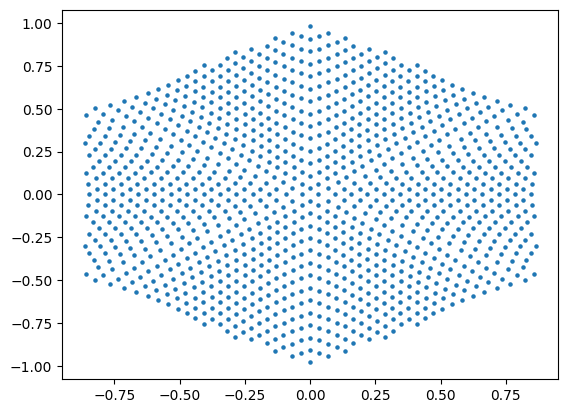

In [155]:
k = KBasis(0, 0, 6, 1)

xs, ys = qp_circle(40)
xs = np.array([xs])
ys = np.array([ys])

rs, thetas = k.cart_to_polar(xs, ys)
thetas += np.pi / 4

r_alpha = k.variable_radius_theta(thetas)
rs *= r_alpha

xs, ys = k.polar_to_cart(rs, thetas)
plt.scatter(xs, ys, s=5)
ax.set_aspect("equal")

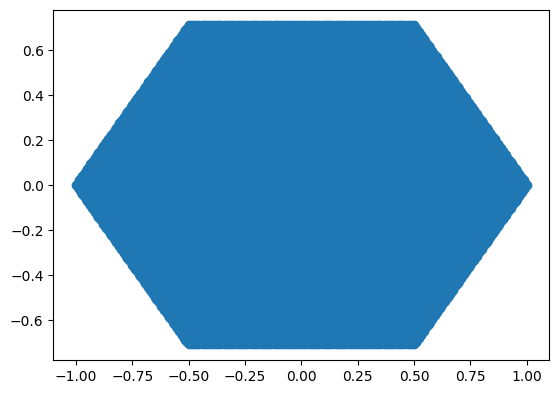

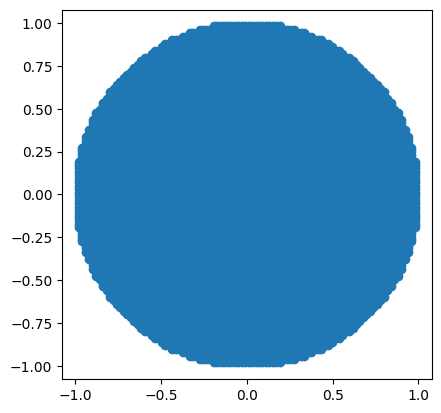

In [131]:
for gleep in (qp_hex(0.01), qp_circle(100)):
    xs, ys = gleep
    
    fig, ax = plt.subplots()
    ax.scatter(xs, ys)
    ax.set_aspect("equal")
    plt.show()

# k basis

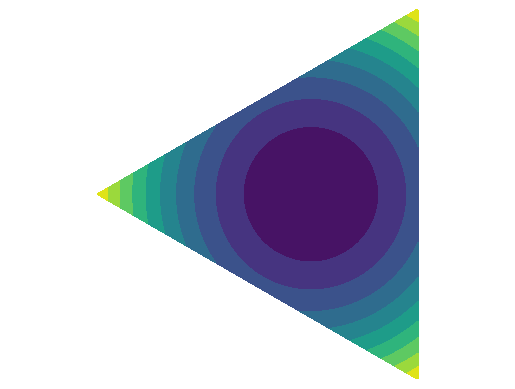

n = 0


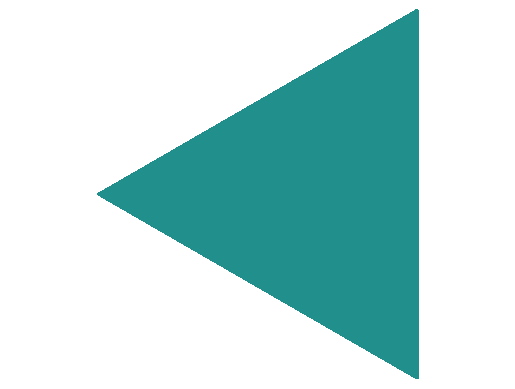

n = 1


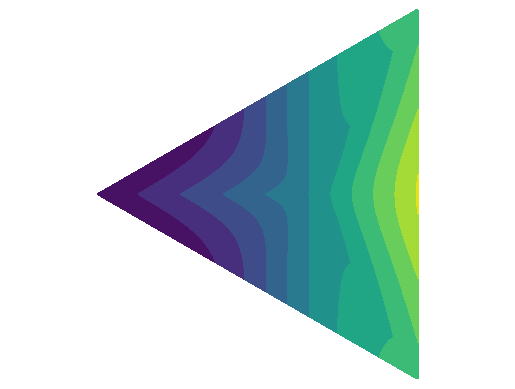

n = 2


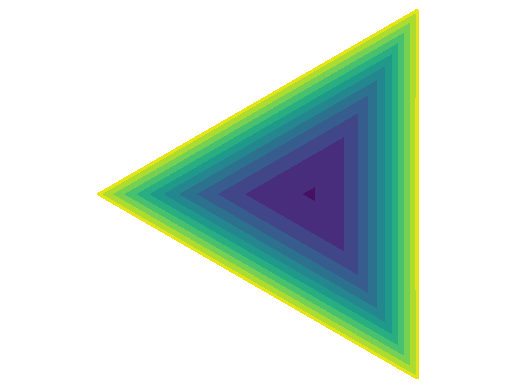

n = 3


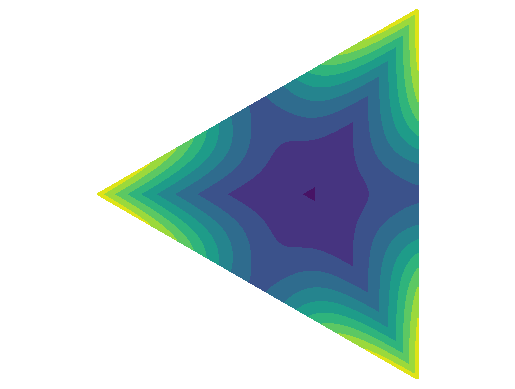

n = 4


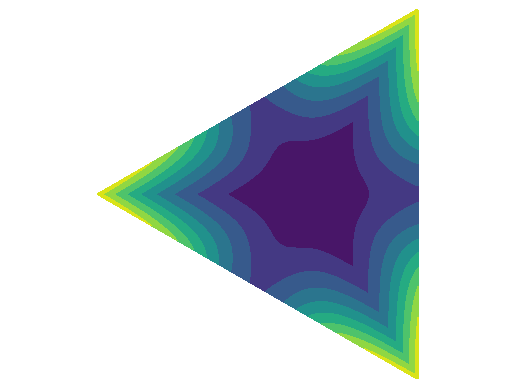

n = 5


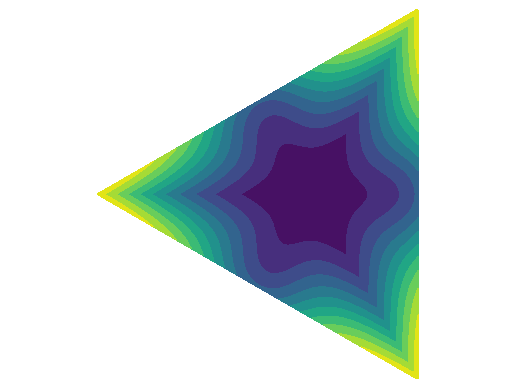

n = 6


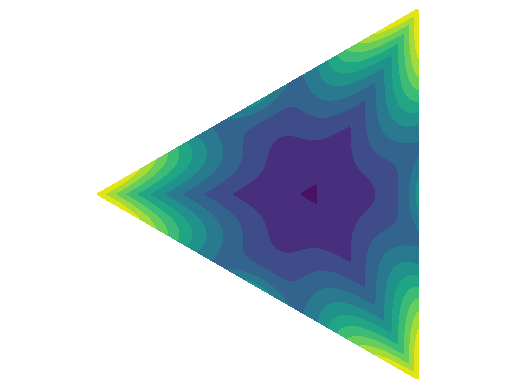

n = 7


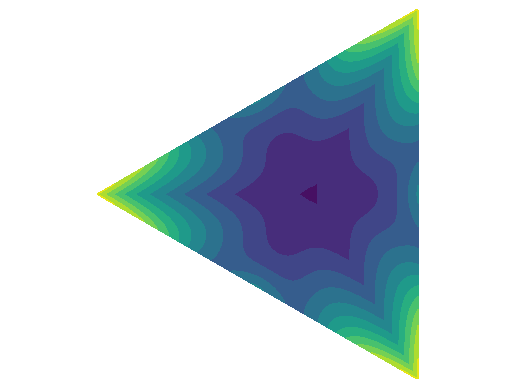

n = 8


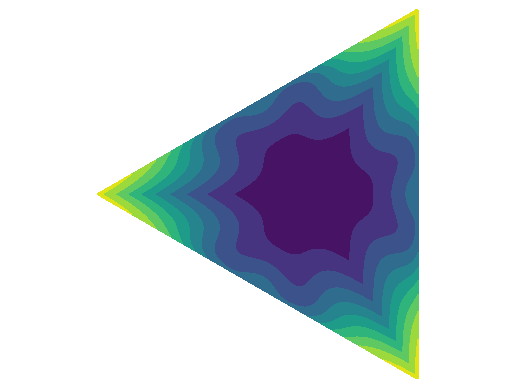

n = 9


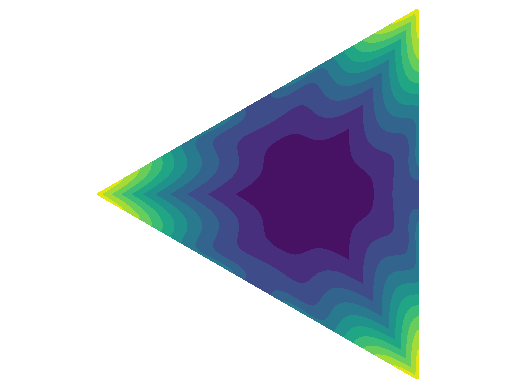

n = 10


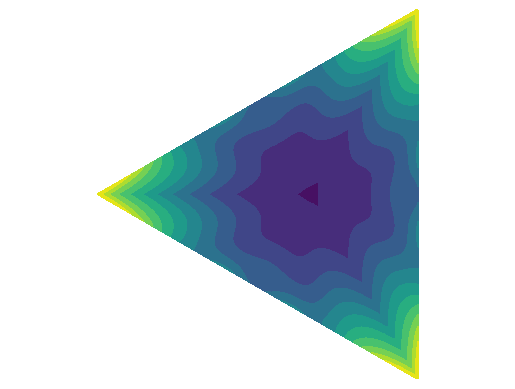

n = 11


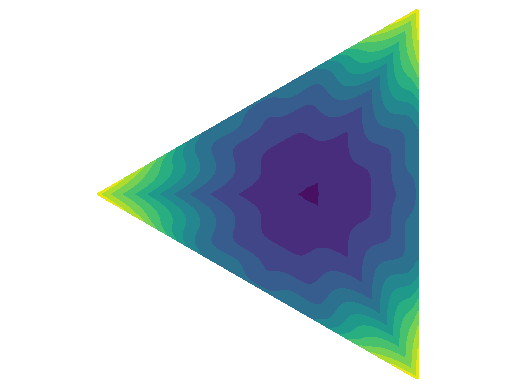

n = 12


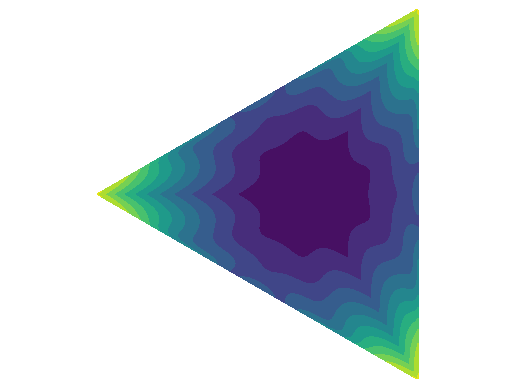

n = 13


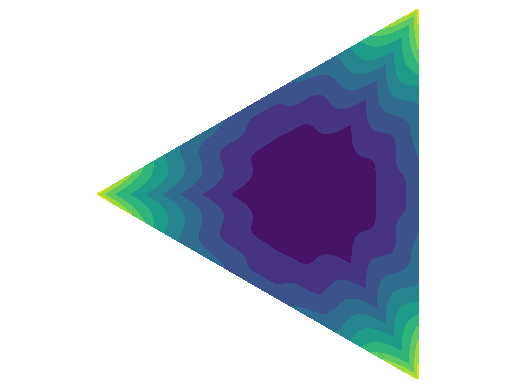

n = 14


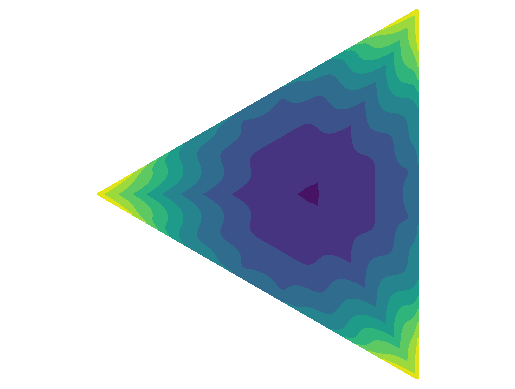

n = 15


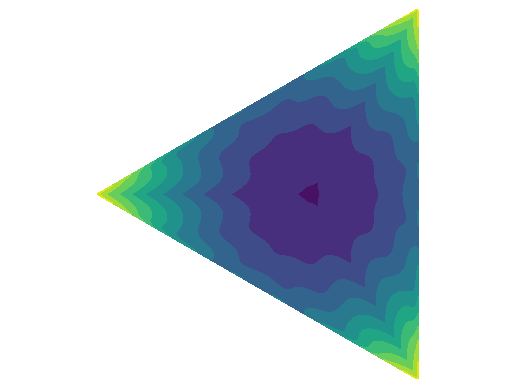

n = 16


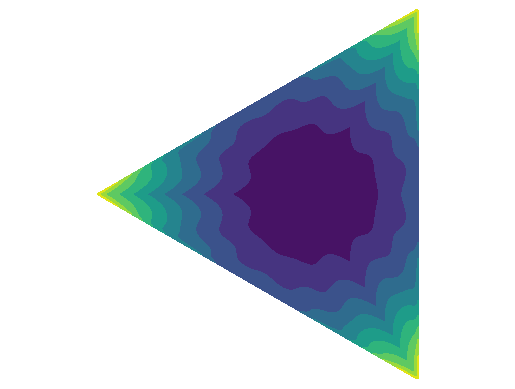

n = 17


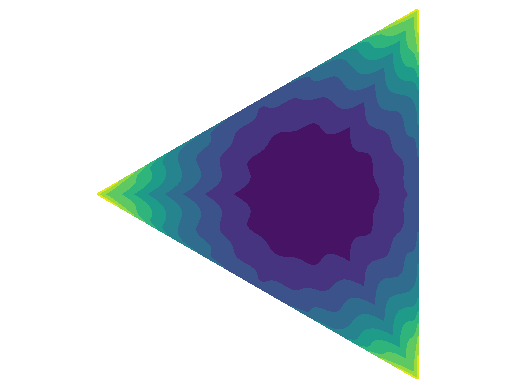

n = 18


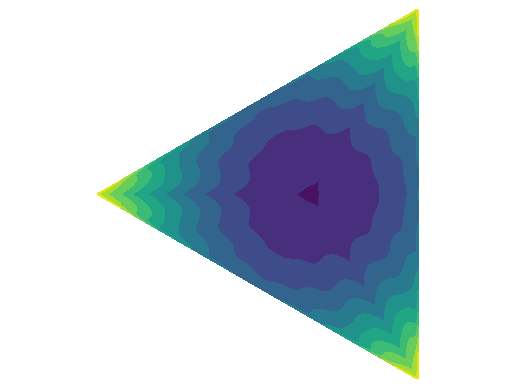

n = 19


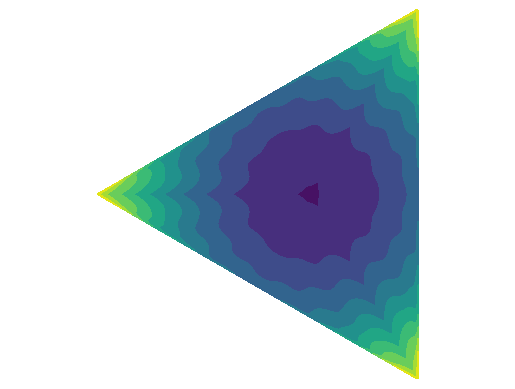

n = 20


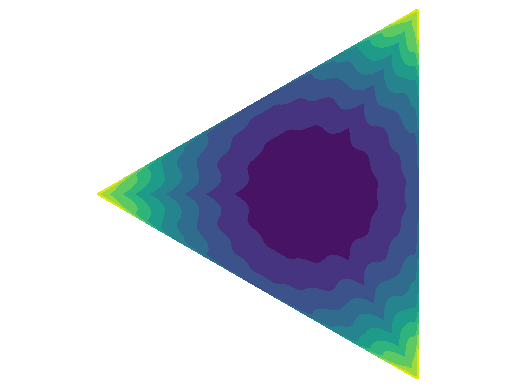

n = 21


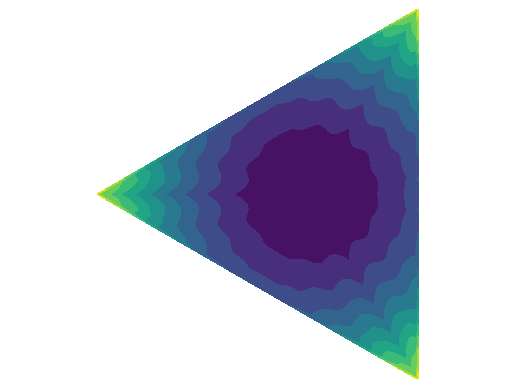

n = 22


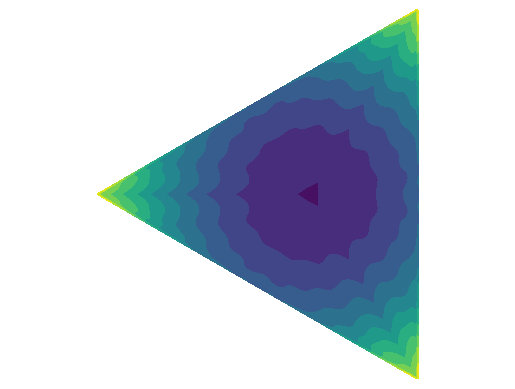

n = 23


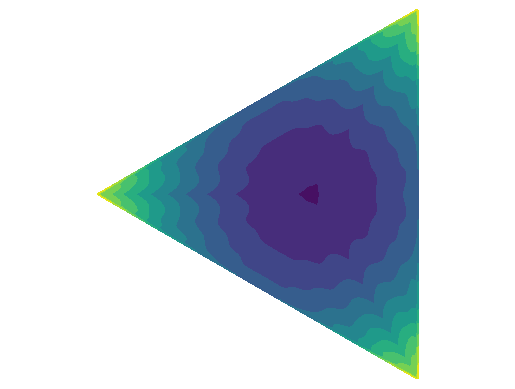

n = 24


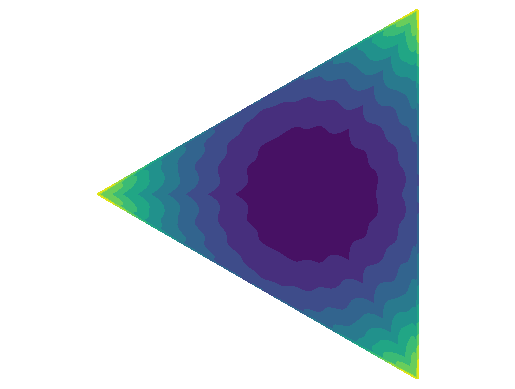

n = 25


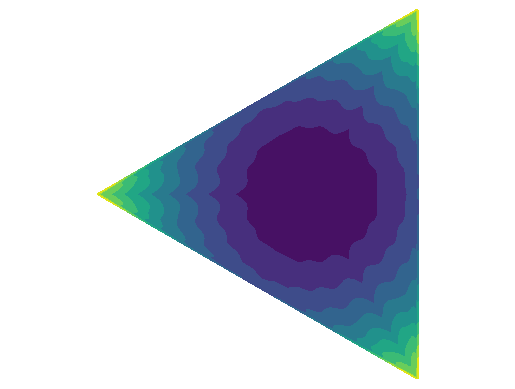

n = 26


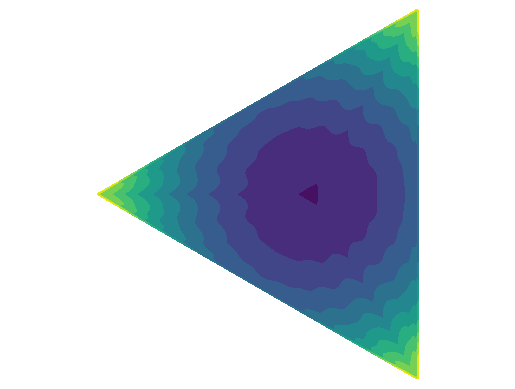

n = 27


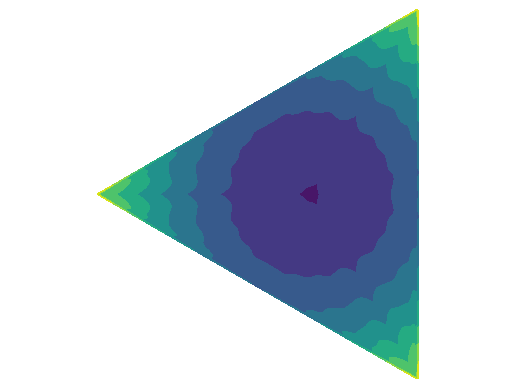

n = 28


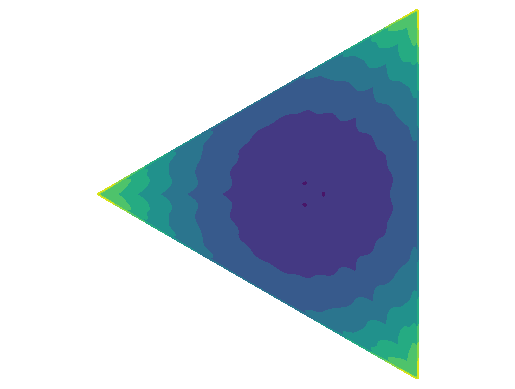

n = 29


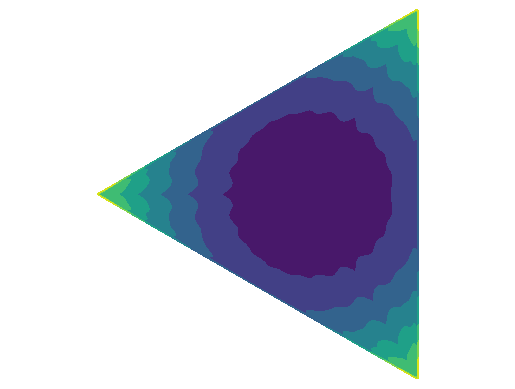

n = 30


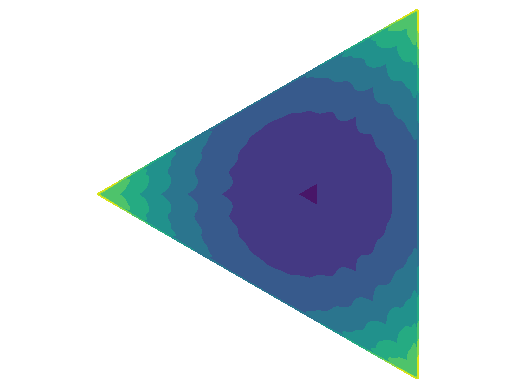

n = 31


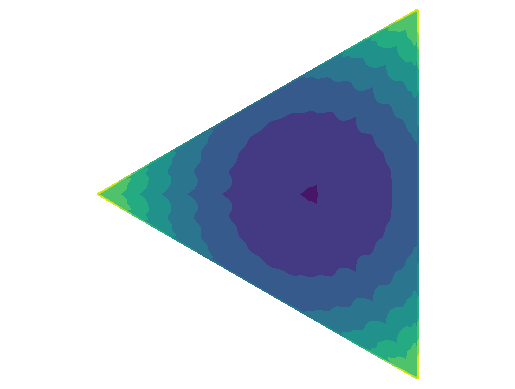

n = 32


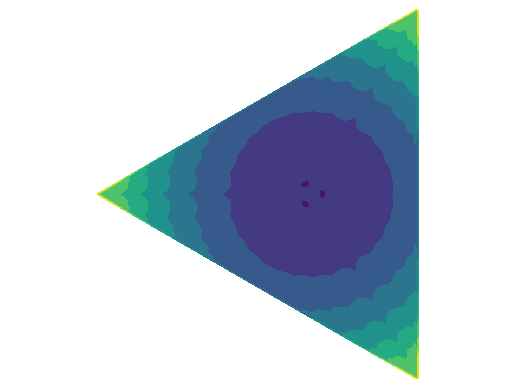

n = 33


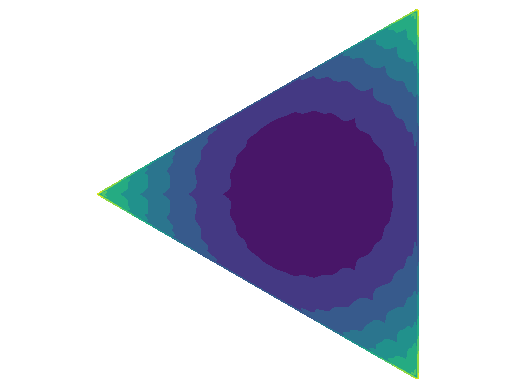

n = 34


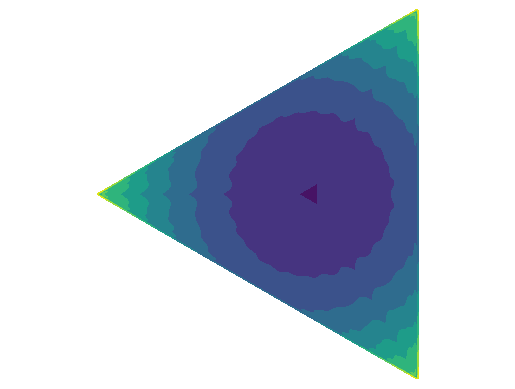

n = 35


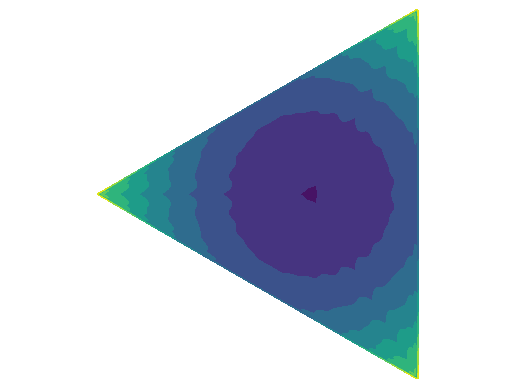

In [13]:
# parameters
order = 35
radius = 1
mesh_size = 1000  # m`ake 5k
side_num = 3

def parabolic(x, y):
    return x**2 + y**2

# coordinates
z1 = ZApprox(side_num, radius, mesh_size)
k1 = KApprox(side_num, radius, mesh_size)
x, y = z1.x, z1.y

# analytical
Fa = parabolic(x, y)


def plotter(z, title='', savepath=''):
    fig, ax = plt.subplots()
    plot = ax.contourf(x, y, z, levels=10)

    ax.axis('equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

    if title:
        plt.title=title
    if savepath:
        plt.savefig(f"{savepath}.png", dpi=600) 
    plt.show()


# do the analytical save
plotter(Fa, title="Analytical", savepath=f"presentations/webbing/ana.png")

Fz = 0
Fk = 0

# coefficient calcs
for n in range (order + 1):
    print(f"n = {n}")
    for m in np.arange(-n, n + 1, 2):
        #print(f"m = {m}")
        # z basis
        bz = ZBasis(n, m, side_num, radius)
        bz._gen_all_cd(mesh_size)

        cz = bz.num_cz_nm(mesh_size, parabolic)
        cz_out = (str(n) + "," + str(m) + "," + str(cz))

        Fz += np.float64(cz * bz.z_nm(x, y))

        # k basis
        bk = KBasis(n, m, side_num, radius)
        bk._gen_all_cd(mesh_size)

        ck = bk.num_ck_nm(mesh_size, parabolic)
        ck_out = (str(n) + "," + str(m) + "," + str(ck))

        Fk += np.float64(ck * bk.k_nm(x, y))

    plotter(Fk, title=f"K Order = {n}", savepath=f"presentations/webbing/k{n}.png")